---
># **WELCOME TO TEAM 6**
---

---
>## **Đề tài:** KHAI PHÁ QUAN ĐIỂM
>## *Phân tích cảm xúc trên bình luận phim*
---
>### Lớp: Khai phá Web 20222
>### Danh sách thành viên:
1. Trịnh Đức Tiệp - 20194185
2. Chu Mạnh Tiến - 20194182
3. Trần Văn Phúc - 20194139
4. Trần Thành Long - 20194102

>### GVHD: **TS. Nguyễn Kiêm Hiếu**
---

# **A. Tổng hợp dữ liệu**


Dữ liệu mà nhóm thu thập được bao gồm 2 tập:
- Một tập chứa khoảng 50.000 review film có 2 nhãn là positive và negative
- Một tập chỉ chứa khoảng 2.500 review film có nhãn neutral

Trong phần này nhóm sẽ định dạng dữ liệu nhãn neutral rồi concat vào tập dữ liệu positive và negative.

Cuối cùng là shuffle bộ dữ liệu để tạo tập dữ liệu ngẫu nhiên

## 1. Lọc sentiment = 2 (neutral)
Lọc các review có sentiment = 2 từ bộ dữ liệu thứ 2

In [ ]:
import pandas as pd

# Đọc file .tsv vào DataFrame
data = pd.read_csv('train.tsv', sep='\t')

data = data.groupby('SentenceId').first()
result = data[data['Sentiment'] == 2]

# Lọc các câu có 'Sentiment' bằng 2
# filtered_data = data[data['Sentiment'] == 2]

# # Trích xuất câu đầu tiên của mỗi nhóm 'SentenceId'
# result = filtered_data.groupby('SentenceId').first()

result.to_csv('output.tsv', sep='\t', index=False)



<ipython-input-4-71410a25242a>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.tsv', sep='\t')


## 2. Định dạng lại dữ liệu neutral đã lọc

In [ ]:
import pandas as pd
import numpy as np

# Đọc file dữ liệu
data = pd.read_csv('output.tsv', delimiter='\t')

# Xóa cột PhraseId
data = data.drop('PhraseId', axis=1)

# Chuyển đổi giá trị Sentiment từ số sang nhãn tương ứng
sentiment_mapping = {2.0: 'neutral'}
data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)

# Lưu file dữ liệu thành CSV
data.to_csv('output_1.csv', index=False)

## 3. Trộn dữ liệu neutral vào dữ liệu positive và negative đã có

In [ ]:
import csv
import random

# Đường dẫn tới file output1.csv
file1 = 'output_2.csv'
# Đường dẫn tới file output2.csv
file2 = 'output_3.csv'
# Đường dẫn tới file output3.csv
file3 = 'output_4.csv'

# Đọc dữ liệu từ file output1.csv
data1 = []
with open(file1, 'r') as f1:
    reader = csv.DictReader(f1)
    for row in reader:
        data1.append(row)

# Đọc dữ liệu từ file output2.csv
data2 = []
with open(file2, 'r') as f2:
    reader = csv.DictReader(f2)
    for row in reader:
        data2.append(row)

# Trộn hai danh sách dữ liệu lại với nhau
combined_data = data1 + data2
random.shuffle(combined_data)

# Ghi dữ liệu vào file output3.csv
with open(file3, 'w', newline='') as f3:
    fieldnames = ['review', 'sentiment']
    writer = csv.DictWriter(f3, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

Dữ liệu sau khi tổng hợp được lưu ra file: https://drive.google.com/file/d/1USnxrSqzrLXnaiX7eC2IWJlCcih0X_j3/view

# **B. Làm sạch dữ liệu**

## **0. Đọc file dữ liệu**
Nguồn: https://drive.google.com/file/d/1USnxrSqzrLXnaiX7eC2IWJlCcih0X_j3/view

In [ ]:
# install PyDrive
!pip install -U -q PyDrive

In [ ]:
# import lib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

In [ ]:
# authenticate drive account and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# read file from google drive url:
url = 'https://drive.google.com/file/d/1USnxrSqzrLXnaiX7eC2IWJlCcih0X_j3/view'
fileId = url.split("/")[-2]

# download file by id
downloaded = drive.CreateFile({'id': fileId})

# write to file output_4.csv
downloaded.GetContentFile('output_4.csv')

# read csv to array of dictionary (through dataframe)
data = pd.read_csv('output_4.csv').to_dict('records')
data[123]['review']

"I saw this film at the Galway Film Fleadh the year it won best short film. I have to say that i thought the direction was fantastic and the performances from the key cast members were very memorable. Both of the main cast are definitely names to watch out for.<br /><br />The final shot over the cliff was mesmerizing and i for one would like to find myself there if i was waiting for the end of the world to happen. The kiss was definitely a great payoff, done with great enthusiasm's!! <br /><br />I can only assume that the film was shot on film, and i have heard that the DOP won an award at the Tribeca Film Festival for his work on this film and i must say.... well deserved.<br /><br />I would recommend this film to anyone who was a teenager in the 1980s. It brought back some great memories and some scary ones."

In [ ]:
# Thao tác trên data:
print(len(data))
print(data[52000]['review'] + " - " + data[52000]['sentiment'])

# for
num_neutral = 0
for review in data:
  if review['sentiment'] == 'neutral':
    num_neutral += 1
print("Num neutral = " + str(num_neutral))

# filter:
print(len(list(filter(lambda review: "<br />" in review['review'], data))))

52300
First, I want to clear a common misconception: It is not unrealistic that the school Zoey goes to gives students laptops. At my school, those in grade 7 and higher must have Apple Macbooks (this is payed for in the entrance fee). Moving on. This show is very annoying. It has boring, predictable plots and bad acting. Often in the show it brings "girl power" to a new high, with girls beating guys in everything they try. But that is not the worst. The worst is that girls are nevertheless all portrayed as being focused on their personal appearances, and screaming whenever they are happy. Except for the one smart girl, who is portrayed as a freak who is obsessed with ugly boys and science. However, this show is very addictive. I do not know why, but it is. Although, the most recent season has been SO terrible, bringing the stereotypes, boring plots, and bad acting to extremes I never thought were reachable, so I am no longer addicted, thankfully. - negative
Num neutral = 2300
29200


## 1. Remove HTML TAGS

Loại bỏ các phần tử thẻ html khỏi các review

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import copy

# clone data:
clone = copy.deepcopy(data)

# change to lowercase
for review in clone:
  review['review'] = review['review'].lower();


After seeing a heavily censored version of this movie on television years ago, I was curious to see the unedited version. I was surprised that it was more believable and well acted than I remembered, but one thing really stood out. I think other reviewers have mentioned this also, namely, what exactly is the nature and motivation of the Chris Sarandon character? Has he raped other victims before? Is he completely psychotic or an "average" sociopath? How did he expect to get away with his attack on the younger sister? Is this character at all credible, or is it just a matter of more background being necessary? He seems almost simultaneously to be an uncomfortably believable character, and too crazy to actually be able to hold on to a teaching job that puts him in contact with young, vulnerable girls. This seems to to be the biggest complaint of viewers in general. It has nothing to do with his performance, which is terrifyingly convincing.The movie occupies an uneasy position between sh

In [ ]:

print(data[10663]['review'])
print(data[10663]['sentiment'])

print(clone[10663]['review'])
print(clone[10663]['sentiment'])

As I said, sometimes low budget is good. You get to see a good movie without a lot of the extra BS that can hide an otherwise piece of crap. Well...this was that piece of crap. If anything, I thought it had humor, unfortunately the humor was unintentional. The only half-witted acting came from Bill Smith and his part was cut out (that's a joke). There was never a Bill Smith, nor was there anyone cast who could act. Even Gerald Okamura sucked, and he's been cast in nearly 40 movies. The fight scenes were comical and made me feel like I could kick all their $%#@#$. The sound was horrible, as if all sound was recorded on the set. My 10 year old could have written a better script...BTW, my 10 year old fell asleep...no kidding. I give a B+ to editing for cutting the movie to only 90 minutes...60 minutes would have been an A+.
negative
said sometimes low budget good get see good movie without lot extra hide otherwise piece crap well piece crap anything thought humor unfortunately humor unint

In [ ]:

print("num <br /> = " + str(len([review for review in clone if "<br />" in review['review']])))

for review in clone:
  # replace html tag to empty string: ''
  review['review'] = re.sub(r'<[^>]+>', '', review['review'])

print("num <br /> = " + str(len([review for review in clone if "<br />" in review['review']])))

num <br /> = 29200
num <br /> = 0


## 2. Remove emojis

Loại bỏ các ký tự biểu thị cảm xúc trong các review

In [ ]:
for review in clone:
  review['review'] = review['review'].encode("ascii","ignore")
  review['review'] = review['review'].decode()

## 3. Remove number

Loại bỏ các con số

In [ ]:
for review in clone:
  review['review'] = re.sub(r'\d', '', review['review'])

## 4. Remove Punctuation
Loại bỏ dấu câu

In [ ]:
for review in clone:
  review['review'] = re.sub(r'[^\w\s]', ' ', review['review'])

## 5. Remove Stopwords
Loại bỏ từ dừng

Danh sách các từ dừng tiêu chuẩn của tiếng Anh được tải về từ thư viện ```nltk```


```
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
```



In [ ]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

# vi_stopwd = set(stopwords.words('vietnamese'))
# print(vi_stopwd)

{'very', "you're", 'both', 'will', 'after', 'shan', 're', 'some', 'she', "you'd", 'so', 'this', 'all', 'over', 'been', 'during', "weren't", 'when', 'while', 'their', 'is', 'whom', 'on', 'haven', "should've", 'most', 'just', 'against', "doesn't", 'm', 'herself', 'themselves', 'at', "that'll", 'doesn', 'ma', "you've", 'each', 'before', 'myself', 'i', 'won', 'and', 'were', 'ourselves', 'which', 'once', "isn't", 'of', 'hasn', "hasn't", 'up', 'above', "mightn't", 'than', 'do', 'couldn', 'who', 'between', 'out', 'below', 'why', 'they', 'has', 'through', "aren't", 'had', 'can', 'too', "don't", 'my', 'only', 'should', 'being', 'our', 'didn', 'yourselves', 'we', 'with', 'any', 'ours', 'he', 've', 'are', 'its', 'me', 'having', 'until', 'his', 'was', 'doing', 'hadn', 'y', 'don', 'him', 'ain', 'mustn', 'under', "wasn't", 'yourself', 'itself', 'from', "didn't", "haven't", 'those', 'off', 'more', 'have', 'weren', 'am', 'her', 'theirs', 'same', 'again', 't', 'you', 'further', "she's", 'how', 'own', '

In [ ]:
for review in clone:
  review['review'] = ' '.join([word for word in review['review'].split() if word not in STOPWORDS])

## 6. Removing words whose length is less than 2

Xóa bỏ đi các từ trong review có độ dài nhỏ hơn 2

Đây thường là các từ bị gõ nhầm, gõ thừa hoặc bị sai chính tả và ít mang thông tin ý nghĩa trong đó

In [ ]:
for review in clone:
  review['review'] = ' '.join([word for word in review['review'].split() if len(word) > 2])

## 7. Fixing Contractions
Khôi phục các từ viết tắt.

Một số từ được viết tắt có thể làm sai lệch ý nghĩa ban đầu của nó.

Bước này giúp khôi phục lại các cụm từ viết tắt phổ biến trong tiếng Anh.

Sử dụng thư viện ```contractions```

In [ ]:
!pip3 install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.8 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
for review in clone:
  review['review'] = contractions.fix(review['review'])

## 8. Stemming or Lemmatizing the words
Khôi phục lại các từ về dạng nguyên mẫu

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')

In [ ]:
for review in clone:
  review['review'] = lemmatizer.lemmatize(review['review'])


## **9. Lưu dữ liệu sau làm sạch ra file**

Dữ liệu sau khi tiền xử lý được xuất ra file data.csv và được lưu trên url: https://drive.google.com/file/d/1Ml8qV2P9GkNiJgw7P9Hdnlo3Ixo4QwvG/view?usp=sharing

In [ ]:
import csv

In [ ]:
file_name = 'data.csv'
fields = list(clone[0].keys())
with open(file_name, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    # Ghi tiêu đề (header) của các trường
    writer.writeheader()

    # Ghi dữ liệu từ mỗi từ điển vào các hàng trong tệp tin CSV
    for row in clone:
        writer.writerow(row)

# **C. Word Embedding**

Có nhiều phương pháp có thể dùng để nhúng từ như PMI, Word2Vec, GloVe hoặc thậm chí là làm thủ công. Trong đề tài này, nhóm sẽ lựa chọn công cụ Word2Vec để nhúng các từ trong mỗi bình luận.

Word2Vec có hai phương pháp chính là CBOW và Skipgram. Ở đây nhóm cũng chỉ ra rõ rằng phương pháp sẽ được sử dụng là Skipgram

## 1. Chia các câu thành các từ riêng **lẻ**

Kết quả của quá trình này sẽ được lưu trong cột mới có tên là 'tokens'. Mỗi phần tử trong cột 'tokens' sẽ là một danh sách các từ đã được tách ra từ câu tương ứng.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

url = 'https://drive.google.com/file/d/1Ml8qV2P9GkNiJgw7P9Hdnlo3Ixo4QwvG/view'
fileId = url.split("/")[-2]

# download file by id
downloaded = drive.CreateFile({'id': fileId})

# write to file data.csv
downloaded.GetContentFile('data.csv')

data = pd.read_csv('data.csv', names=['review', 'sentiment'])
data = data.iloc[1:].reset_index(drop=True)

data = data[data['review'].apply(lambda x: isinstance(x, str))] # trong file data.csv vẫn còn phần tử rỗng

In [ ]:


# Tokenize các câu trong cột 'review' - chỉ là an toàn hơn so với split " "
data['tokens'] = data['review'].apply(word_tokenize)


Kiểm tra thử cột 'tokens' sau khi đã thêm vào

In [ ]:
print(data['tokens'][10815])
print(data['tokens'][10816])
print(data['tokens'][10818])
print(data['tokens'][10819])
# print(data['tokens'][10817])

import copy
cloneData = copy.deepcopy(data)

['surprised', 'number', 'folks', 'rated', 'entry', 'favorite', 'chan', 'ever', 'see', 'opera', 'treasure', 'island', 'latter', 'ironically', 'written', 'john', 'larkin', 'dropped', 'ball', 'plot', 'train', 'wreck', 'overloaded', 'pointless', 'characters', 'first', 'viewers', 'required', 'recall', 'sordid', 'details', 'steve', 'mcbirney', 'played', 'venerable', 'thug', 'huac', 'squealer', 'marc', 'lawrence', 'murder', 'spree', 'let', 'forget', 'escaped', 'capital', 'murder', 'rap', 'courthouse', 'lone', 'policeman', 'tail', 'also', 'victim', 'fished', 'river', 'years', 'earlier', 'one', 'ever', 'seems', 'concerned', 'suspension', 'disbelief', 'required', 'characters', 'seemingly', 'trapped', 'wax', 'museum', 'although', 'inspector', 'matthews', 'manages', 'wield', 'fat', 'wet', 'rear', 'end', 'inside', 'window', 'joan', 'valerie', 'cream', 'assistant', 'movie', 'even', 'handle', 'pliers', 'properly', 'realize', 'chan', 'suffers', 'boo', 'boo', 'yeesh', 'years', 'old', 'less', 'lines', '

### Chuyển từ dict của các array thành array của các dict
Biến data hiện tại đang có format:
```
data = {
  review:     ['good film', 'bad movie', ...],
  sentiment:  ['positive', 'negative', ...],
  tokens:     [['good', 'film'], ['bad', 'movie'], ...]
}
```
Copy từ data sang clone có format:
```
clone = [
  {
    review: 'good film',
    sentiment: 'positive',
    tokens: ['good', 'film']
  }, {
    review: 'bad movie',
    sentiment: 'negative',
    tokens: ['bad', 'movie']
  }, ...
]
```

In [ ]:
import copy

# clone data:
clone = []
length = len(cloneData['sentiment'])

for i in range(0, length):
    if i not in cloneData['review']:
        continue
    clone.append({
        'review': cloneData['review'][i],
        'sentiment': cloneData['sentiment'][i],
        'tokens': cloneData['tokens'][i]
    })
print(clone[123])

{'review': 'saw film galway film fleadh year best short film say thought direction fantastic performances key cast members memorable main cast definitely names watch final shot cliff mesmerizing one would like find waiting end world happen kiss definitely great payoff done great enthusiasm assume film shot film heard dop award tribeca film festival work film must say well deserved would recommend film anyone teenager brought back great memories scary ones', 'sentiment': 'positive', 'tokens': ['saw', 'film', 'galway', 'film', 'fleadh', 'year', 'best', 'short', 'film', 'say', 'thought', 'direction', 'fantastic', 'performances', 'key', 'cast', 'members', 'memorable', 'main', 'cast', 'definitely', 'names', 'watch', 'final', 'shot', 'cliff', 'mesmerizing', 'one', 'would', 'like', 'find', 'waiting', 'end', 'world', 'happen', 'kiss', 'definitely', 'great', 'payoff', 'done', 'great', 'enthusiasm', 'assume', 'film', 'shot', 'film', 'heard', 'dop', 'award', 'tribeca', 'film', 'festival', 'work',

In [ ]:
maxlen = 0
maxsen = None
lenthes = []
countSentiment = {
    "positive": 0,
    "negative": 0,
    "neutral": 0
}

for sen in clone:
    if maxlen < len(sen['tokens']):
        maxlen = max(maxlen, len(sen['tokens']))
        maxsen = sen
    lenthes.append(len(sen['tokens']))
    countSentiment[sen['sentiment']] += 1
print(maxlen)
print(maxsen['tokens'])
print(len(maxsen['tokens']))

1384
['match', 'tag', 'team', 'table', 'match', 'bubba', 'ray', 'spike', 'dudley', 'eddie', 'guerrero', 'chris', 'benoit', 'bubba', 'ray', 'spike', 'dudley', 'started', 'things', 'tag', 'team', 'table', 'match', 'eddie', 'guerrero', 'chris', 'benoit', 'according', 'rules', 'match', 'opponents', 'tables', 'order', 'get', 'win', 'benoit', 'guerrero', 'heated', 'early', 'taking', 'turns', 'hammering', 'first', 'spike', 'bubba', 'ray', 'german', 'suplex', 'benoit', 'bubba', 'took', 'wind', 'dudley', 'brother', 'spike', 'tried', 'help', 'brother', 'referee', 'restrained', 'benoit', 'guerrero', 'ganged', 'corner', 'benoit', 'stomping', 'away', 'bubba', 'guerrero', 'set', 'table', 'outside', 'spike', 'dashed', 'ring', 'somersaulted', 'top', 'rope', 'onto', 'guerrero', 'outside', 'recovering', 'taking', 'care', 'spike', 'guerrero', 'slipped', 'table', 'ring', 'helped', 'wolverine', 'set', 'tandem', 'set', 'double', 'superplex', 'middle', 'rope', 'would', 'put', 'bubba', 'table', 'spike', 'knoc

Text(0.5, 1.0, 'Thống kê số lượng nhãn')

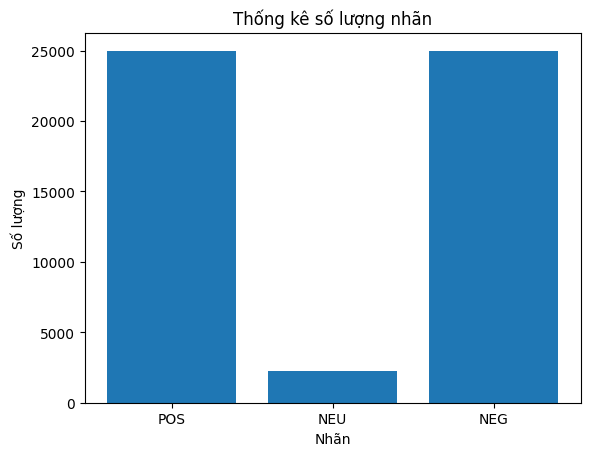

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['POS', 'NEU', 'NEG'], [countSentiment['positive'], countSentiment['neutral'], countSentiment['negative'] ])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Thống kê số lượng nhãn')


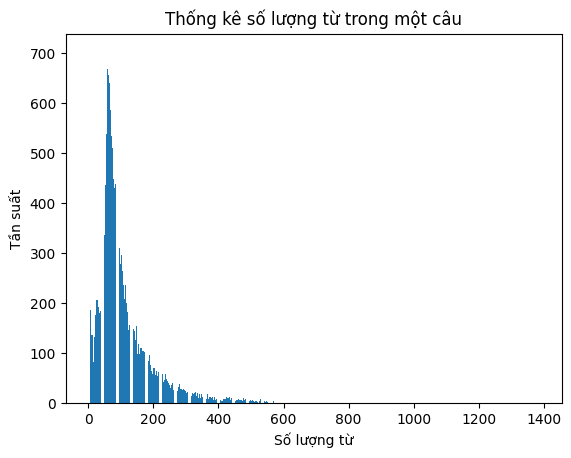

In [ ]:
import matplotlib.pyplot as plt

def plot_frequency(data):
    unique_values = list(set(data))
    frequencies = [data.count(value) for value in unique_values]

    plt.bar(unique_values, frequencies)
    plt.xlabel('Số lượng từ')
    plt.ylabel('Tần suất')
    plt.title('Thống kê số lượng từ trong một câu')

    plt.show()

plot_frequency(lenthes)

##2. Xây dựng mô hình skip-gram

In [ ]:
from gensim.models import Word2Vec

# sentences = data['tokens'] # danh sách các câu đã được tokenize
# vector_size = 200 # kích thước vector từ được nhúng (thường 100-300)
# window = 5 # Kích thước cửa sổ xung quanh từ hiện tại trong quá trình huấn luyện
# min_count = 1 # Số lần xuất hiện tối thiểu của một từ để được nhúng
# sg = 1 # lựa chọn mô hình skip-gram
# # Xây dựng mô hình Word2Vec với mô hình Skip-gram
# model = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count, sg=sg)

# Xây dựng mô hình Word2Vec với mô hình Skip-gram
skip_gram = Word2Vec(
    sentences     = data['tokens'],
    vector_size   = 100,  # kích thước vector từ nhúng (thường 100-300)
    window        = 5,    # kích thước cửa sổ quét
    min_count     = 1,    # số lần xuất hiện tối thiểu một từ được nhúng
    sg            = 1     # lựa chọn mô hình skip-gram
)

model = skip_gram

In [ ]:
import joblib

# Ghi mô hình vào file
joblib.dump(model, 'skip_gram.pkl')


['skip_gram.pkl']

In [ ]:
import joblib

model = joblib.load('skip_gram.pkl')
skip_gram = model

Lấy vector cho từ cụ thể

In [ ]:
word_vector = model.wv['good']
print(word_vector)

[-2.69875050e-01  3.79897982e-01 -3.61304767e-02  3.49005938e-01
 -4.19581234e-02 -1.41525596e-01 -2.09413588e-01  6.59258902e-01
 -1.59668207e-01 -2.15608776e-01 -4.76256371e-01 -3.20302725e-01
 -4.67264801e-01  5.85727431e-02 -4.96181212e-02  1.69538576e-02
 -1.10618800e-01 -1.81116790e-01 -2.03738250e-02 -9.01264966e-01
  3.02304812e-02 -4.48964946e-02  1.35376126e-01 -4.13359135e-01
  4.69313785e-02  2.40511373e-01 -2.70256549e-01 -2.62510121e-01
 -5.01135170e-01  3.70823056e-01  2.24467650e-01  2.52283901e-01
  2.52056539e-01 -5.01450300e-01  2.70342454e-02  8.06086659e-02
 -2.44203925e-01 -1.33607790e-01 -1.30365565e-01 -4.44651634e-01
  2.69670069e-01 -3.23013067e-01 -3.01212817e-01  1.56734601e-01
  2.32867077e-01 -3.78528625e-01 -3.13267112e-01 -3.16705406e-01
  2.48748675e-01  2.22082719e-01  3.76418456e-02 -3.61967742e-01
 -3.89373973e-02 -9.06573143e-03 -5.18747978e-02 -4.76038316e-03
  1.81193724e-01  4.41100635e-02 -3.04876529e-02  1.16705783e-01
  1.62744895e-01 -2.00199

Tìm các từ tương tự

In [ ]:
similar_words = model.wv.most_similar('good', topn=5)
print(similar_words)

[('decent', 0.860092282295227), ('great', 0.8258644938468933), ('workable', 0.804896354675293), ('bad', 0.7975878715515137), ('shitty', 0.7957466244697571)]


# **D. Training use Naive Bayes**

## 0. Prepare train data and test data

## 1. Naive bayes use BOW

Chia dữ liệu thành 2 tập train và test tỷ lệ 80:20

In [ ]:
data_train = data['review'][:41000]
data_test = data['review'][41000:]
print( data['review'].shape)
print(data_train.shape)
print(data_test.shape)

(52285,)
(41000,)
(11285,)


Bag of word
Xây dựng từ điển từ tập dữ liệu huấn luyện
Xây dựng ma trận đặc trưng cho cả dữ liệu huấn luyện và dữ liệu test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Count vectorizer
# min_df: tần suất xuất hiện tối thiểu
# max_df: tần suất xuất hiện tối đa
# binary: kết quả có phải dạng nhị phân hay không
# ngram_range: phạm vi ngram muốn tạo

cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
# xây dựng tập từ điển từ data_train và đồng thời tạo ma trận đặc trưng dựa trên nó
cv_train=cv.fit_transform(data_train)
# tạo ma trận đặc trưng dựa trên tập từ điển đã tạo
cv_test=cv.transform(data_test)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)

BOW_cv_train: (41000, 6190105)
BOW_cv_test: (11285, 6190105)


Số hoá và chia tập nhãn lớp

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# chuyển đổi nhãn lớp về dạng số hoá
lb=LabelBinarizer()
#transformed sentiment data label
label_data=lb.fit_transform(data['sentiment'])
#label_data = label_data.reshape(-1, 1)
print(label_data.shape)
print('-----------')
# Chia tập nhãn lớp ra tương ứng với tập dữ liệu (mảng nhị phân 2 chiều)
train_label_data=label_data[:41000]
test_label_data=label_data[41000:]
# đổi thành mảng chỉ chứa chỉ số (mảng 2 chiều -> 1 chiều)
train_label_data = np.argmax(train_label_data, axis=1)
test_label_data = np.argmax(test_label_data, axis=1)
print(train_label_data)
print('-----------')
print(test_label_data)

(52285, 3)
-----------
[2 2 0 ... 2 2 2]
-----------
[0 0 2 ... 0 2 2]


Xem lại xem nhãn lớp váo hoá tương ứng

In [ ]:
# Lấy danh sách tên nhãn lớp
label_names = lb.classes_

# Chuyển đổi từ tên nhãn lớp sang số
label_numbers = lb.transform(label_names)

# In ra tên nhãn lớp và số tương ứng
for name, number in zip(label_names, label_numbers):
    print(f"{name}: {number}")

negative: [1 0 0]
neutral: [0 1 0]
positive: [0 0 1]


Huấn luyện với Multinominal Naive Bayes với Bad of Word

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# mô hình huấn luyện
mnb=MultinomialNB()
# huấn luyện mô hình trên tập Bad of Word
mnb_bow=mnb.fit(cv_train,train_label_data)
print(mnb_bow)

MultinomialNB()


Thực hiện dự đoán trên tập test

In [ ]:
mnb_bow_predict=mnb.predict(cv_test)
print(mnb_bow_predict) # in kết quả dự đoán

[2 2 2 ... 0 2 2]


Tính độ chính xác

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

mnb_bow_score=accuracy_score(test_label_data,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

mnb_bow_score : 0.7259193619849358


in ra số lượng của từng nhãn theo tứ tự (negative - neutral - positive)

In [ ]:
counts = np.bincount(mnb_bow_predict) # dự đoán
print(counts)
counts = np.bincount(test_label_data)
print(counts)

[5732  259 5294]
[5443  497 5345]


In [ ]:
mnb_bow_report=classification_report(test_label_data,mnb_bow_predict,target_names=['Negative', 'Neutral', 'Positive'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Negative       0.73      0.76      0.74      5443
     Neutral       0.76      0.39      0.52       497
    Positive       0.72      0.72      0.72      5345

    accuracy                           0.73     11285
   macro avg       0.74      0.63      0.66     11285
weighted avg       0.73      0.73      0.72     11285



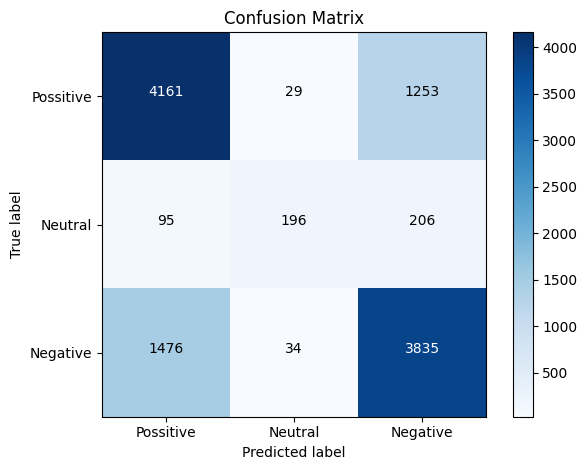

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# # Chuyển đổi xác suất thành nhãn dự đoán
# y_pred_val = np.argmax(y_pred, axis=1)

# # Chuyển đổi nhãn thực tế thành nhãn số
# y_test_val = np.argmax(y_test, axis=1)

# print("predict: ")
# print(y_pred_val)
# print("real:")
# print(y_test_val)

# Tính confusion matrix
cm = confusion_matrix(test_label_data, mnb_bow_predict)

# Vẽ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Possitive', 'Neutral', 'Negative'])
plt.yticks(tick_marks, ['Possitive', 'Neutral', 'Negative'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Tổng thể, mô hình có hiệu suất tốt trong việc phân loại lớp "Negative" và "Positive", trong khi đối với lớp "Neutral" hiệu suất không cao bằng hai lớp còn lại

Confusion matrix

In [ ]:
cm_bow=confusion_matrix(test_label_data,mnb_bow_predict,labels=[1,0])
print(cm_bow)

[[ 196   95]
 [  29 4161]]


## 2. Naive Bayes use Word2Vec Embedding

### Mỗi câu được lấy bằng trung bình các vector từ của nó

In [ ]:
import numpy as np

for review in clone:
    review['sentence'] = np.mean([skip_gram.wv[x] for x in review['tokens']], axis = 0)

In [ ]:
for i in range (0, 5):
    print(clone[i]['sentence'])

[-0.04280065  0.14553964 -0.02622128  0.02625844  0.05232869 -0.29517528
  0.13416822  0.5201033  -0.19743308 -0.23251896 -0.15060711 -0.18074395
 -0.02488711  0.09762575  0.05230512 -0.11872958  0.08714366 -0.17743498
 -0.04390628 -0.5604701   0.04062706  0.06333672  0.19618922 -0.27196142
 -0.02140955  0.14603034 -0.1641842  -0.06054432 -0.2335261   0.0554888
  0.25566143  0.09757462  0.13040866 -0.30414596 -0.11033347  0.21322958
  0.01588825 -0.22075762 -0.15767343 -0.33246067  0.03777985 -0.16449359
 -0.10476631 -0.06076978  0.18036066 -0.21453564 -0.27459356 -0.09954814
  0.1985779   0.22679065  0.1515084  -0.2353911  -0.14839378 -0.0905048
  0.00259575 -0.02531655  0.13275172  0.05389476 -0.10213323  0.12542066
  0.05950042 -0.08972085  0.04170621  0.07022531 -0.23834135  0.18812123
  0.09128997  0.06908368 -0.35265186  0.5276899  -0.22032492  0.1787081
  0.22533558  0.07662065  0.27964103  0.05948555 -0.01794784 -0.03765593
 -0.18965404 -0.04114258 -0.12592593  0.12816411 -0.24

### Số hóa nhãn lớp
- positive: [1 0 0]
- neutral: [0 1 0]
- negative: [0 0 1]


In [ ]:
# sentiment_map_1 = {
#     'positive': [1, 0, 0],
#     'neutral': [0, 1, 0],
#     'negative': [0, 0, 1],
# }

sentiment_map_1 = {
    'positive': [1, 0, 0],
    'neutral': [0, 1, 0],
    'negative': [0, 0, 1],
}

sentiment_map_2 = {
    'positive': 0,
    'neutral': 1,
    'negative': 2,
}

for review in clone:
    review['label'] = sentiment_map_1[review['sentiment']]
    review['label_2'] = sentiment_map_2[review['sentiment']]

### Chia dữ liệu thành tập huấn luyện và tập đánh giá
Kích thước tập test chiếm 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    list(map(lambda x: x['sentence'], clone)),
    list(map(lambda x: x['label_2'], clone)),
    test_size=0.2,
    random_state=2001
)

print(y_test)

[0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 

### Tạo mô hình GaussianNB và fit với tập train

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

joblib.dump(gaussianNB, 'gaussianNB.pkl')

['gaussianNB.pkl']

In [ ]:
gaussianNB = joblib.load('gaussianNB.pkl')

### Đánh giá độ chính xác mô hình

In [ ]:
from sklearn.metrics import classification_report

predict = gaussianNB.predict(X_test)

print("predict: " + str(np.bincount(predict)))
print("reality: " + str(np.bincount(y_test)))


predict: [4813  705 4936]
reality: [4943  468 5043]


In [ ]:
print(classification_report(y_test, predict, target_names = ['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.79      0.76      0.77      4943
     neutral       0.61      0.92      0.73       468
    positive       0.80      0.78      0.79      5043

    accuracy                           0.78     10454
   macro avg       0.73      0.82      0.77     10454
weighted avg       0.78      0.78      0.78     10454



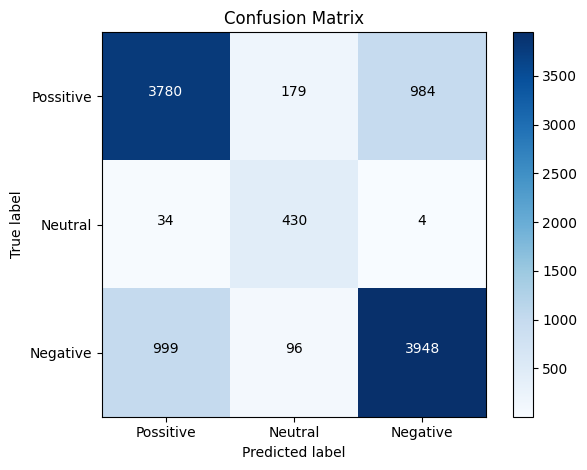

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# # Chuyển đổi xác suất thành nhãn dự đoán
# y_pred_val = np.argmax(y_pred, axis=1)

# # Chuyển đổi nhãn thực tế thành nhãn số
# y_test_val = np.argmax(y_test, axis=1)

# print("predict: ")
# print(y_pred_val)
# print("real:")
# print(y_test_val)

# Tính confusion matrix
cm = confusion_matrix(y_test, predict)

# Vẽ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Possitive', 'Neutral', 'Negative'])
plt.yticks(tick_marks, ['Possitive', 'Neutral', 'Negative'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### Nhận xét mô hình
- Nhìn chung mô hình cho độ chính xác cao hơn sử dụng BOW
- Về mẫu lớp Positive và Negative:
  + Mô hình Naive Bayes sử dụng W2V này cho kết quả là tốt hơn
- Về mẫu lớp Neutral:
  + Độ chính xác Precision thấp hơn sử dụng BOW
  + Độ phủ Recall cao hơn rất nhiều so với BOW

# **E. Training use LSTM**

## Chuẩn bị dữ liệu huấn luyện và đánh giá
- Dữ liệu:
  + Mảng các câu (sentences)
  + Mỗi câu là một mảng các từ, (50 từ)
  + Mỗi từ là một mảng số thực sau khi embeded bởi skip_gram (size = 100)
- Tỉ lệ train - test = 80 - 20

In [ ]:
filter_neutral = [
    x for x in clone
    # if x['sentiment'] != 'neutral'
]

In [ ]:
import numpy as np
import tensorflow as tf

### Lấy theo sentence

In [ ]:


data_train_test = [
    # [skip_gram.wv[word] for word in x['tokens']]
    x['sentence']
    for x in filter_neutral
]

import tensorflow as tf
data_train_test_2 = tf.keras.utils.pad_sequences(data_train_test, maxlen=250)


label_train_test = [x['label'] for x in filter_neutral]

In [ ]:
data_train_test = np.array(data_train_test)
print(data_train_test[:2])
print(data_train_test.shape)

### Lấy theo w2v

In [ ]:

data_train_test = [
    np.array([np.array(skip_gram.wv[word]) for word in x['tokens']])
    for x in filter_neutral[:40000]
]


In [ ]:
data_train_test[12].shape

(60, 100)

In [ ]:
# import numpy as np

# length = len(data_train_test)
# numword = 150
# default_value = 0
# zero_word = np.array([default_value] * 100)
# padded_data_train_test = []

# for i in range(length):
#     arr = data_train_test[i]
#     l = len(arr)

#     if l > numword:
#         arr = arr[:numword]
#     elif l < numword:
#         arr = np.concatenate((arr, [zero_word] * (numword - l)), axis=0)

#     padded_data_train_test.append(arr)

# padded_data_train_test = np.array(padded_data_train_test)



import numpy as np

length = len(data_train_test)
numword = 150
default_value = 0.0
zero_word = np.zeros((100,), dtype=np.float32)
padded_data_train_test = np.zeros((length, numword, 100), dtype=np.float32)

for i in range(length):
    arr = data_train_test[i]
    l = len(arr)

    if l > numword:
        arr = arr[:numword]
    elif l < numword:
        arr = np.concatenate((arr, np.tile(zero_word, (numword - l, 1))), axis=0)

    padded_data_train_test[i] = arr



In [ ]:
del data_train_test

In [ ]:
del padded_data_train_test

In [ ]:
label_train_test = [x['label'] for x in filter_neutral[:40000]]

In [ ]:

print(padded_data_train_test.shape)

(40000, 150, 100)


In [ ]:
import numpy as np
print(np.array(label_train_test).shape)

(40000, 3)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_data_train_test,
    label_train_test,
    test_size=0.2,
    random_state=2001
)


del padded_data_train_test

In [ ]:
print(X_train[:5])
print(y_train[:5])

[[[-0.1353828   0.2523581  -0.05754168 ... -0.2671934   0.09402698
    0.2536418 ]
  [-0.15514949  0.0870486  -0.12826858 ... -0.23942547  0.2465849
    0.2510034 ]
  [ 0.16751271  0.01471905  0.37824592 ...  0.22725208  0.26222098
   -0.31697345]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[-0.0298043   0.18072343 -0.32435262 ... -0.3757575  -0.11990447
    0.21641651]
  [-0.16907308  0.3398134  -0.03376348 ... -0.15125057 -0.2090789
    0.11111598]
  [-0.15591022  0.2164121  -0.22482872 ... -0.32179803  0.0103106
   -0.0878762 ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.06875113  0.6743528  -0.1733094  

In [ ]:
import numpy as np
print(np.array(X_train).shape)

(32000, 150, 100)


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten,MaxPooling1D, SpatialDropout1D
import numpy as np
from keras.preprocessing import text

In [ ]:

w2v_weights = skip_gram.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
MAX_SEQUENCE_LENGTH = 100


## Tạo mô hình và fit

In [ ]:
print(np.array(X_train).shape)
print(np.array(y_train).shape)

(32000, 150, 100)
(32000, 3)


In [ ]:
model = Sequential()
# model.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=X_train.shape[1]))
model.add(LSTM(units=128,activation="tanh",return_sequences=True,
        input_shape=(150, 100)))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=64,activation="tanh"))
model.add(Dense(units=3,activation="softmax"))


model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

earlyStopping = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy',restore_best_weights=True)
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=10,
    batch_size=225,
    validation_split=0.4,
    callbacks=[earlyStopping]
)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 128)          117248    
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 166,851
Trainable params: 166,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
86/86 [==============================] - 146s 2s/step - loss: 0.5221 - accuracy: 0.4860 - val_loss: 0.513

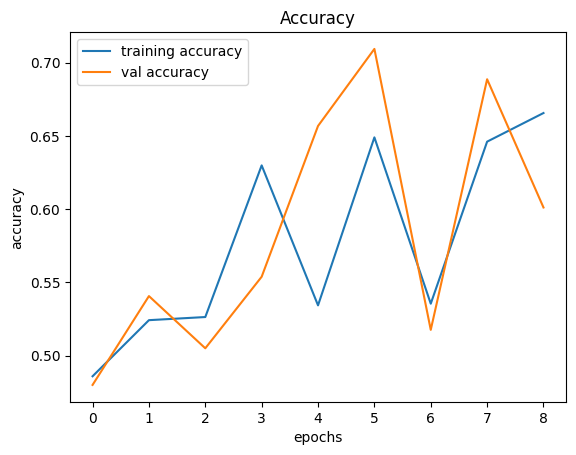

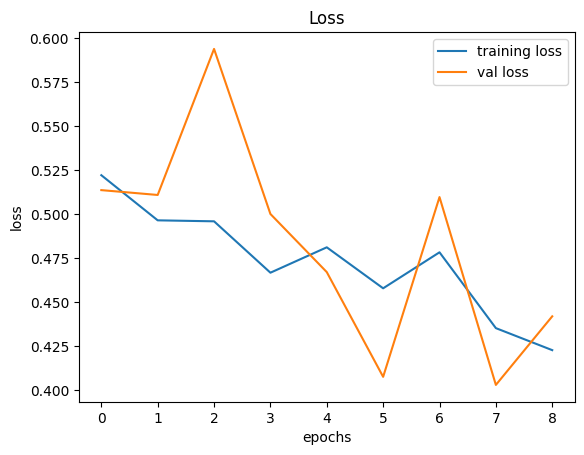

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

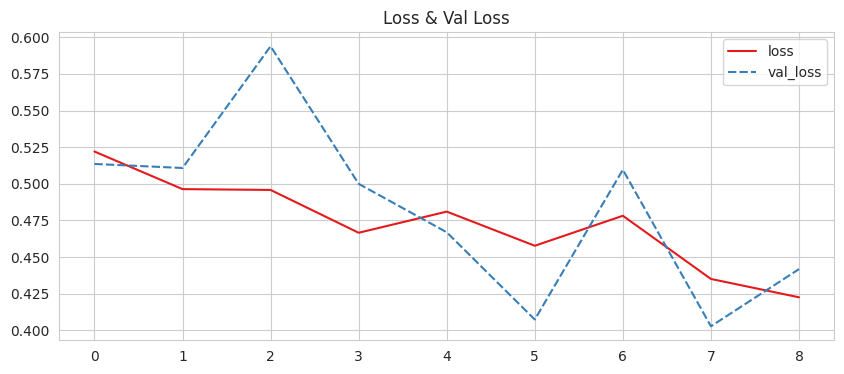

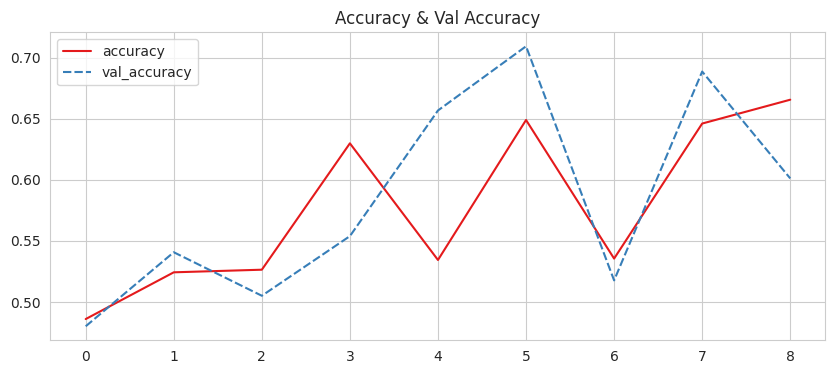

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(history.history)
df_loss = df[['loss', 'val_loss']]
df_acc =  df[['accuracy', 'val_accuracy']]

sns.set_style("whitegrid")

plt.figure(figsize=(10,4))
sns.lineplot(df_loss,palette="Set1")
plt.title("Loss & Val Loss")
plt.show();

plt.figure(figsize=(10,4))
sns.lineplot(df_acc,palette="Set1")
plt.title("Accuracy & Val Accuracy");

In [ ]:
joblib.dump(model, 'lstm.pkl')

['lstm.pkl']

In [ ]:
import numpy as np

loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 31s 123ms/step - loss: 0.4085 - accuracy: 0.7056
Loss:  0.4084911644458771
Accuracy:  0.7056249976158142


In [ ]:
# Dự đoán nhãn với mô hình
y_pred = model.predict(X_test)

250/250 [==============================] - 32s 121ms/step


predict: 
[2 2 0 ... 0 2 2]
real:
[2 2 0 ... 0 0 0]


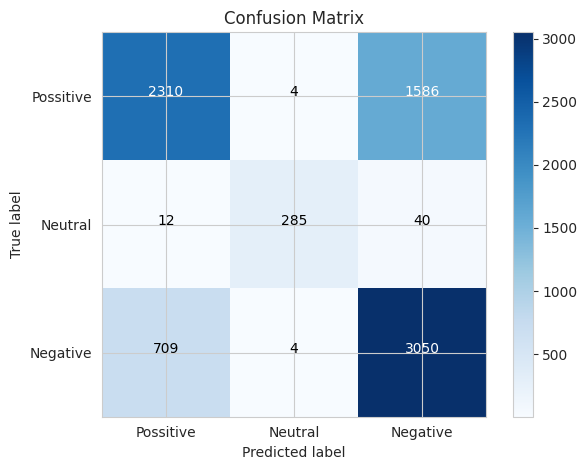

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Chuyển đổi xác suất thành nhãn dự đoán
y_pred_val = np.argmax(y_pred, axis=1)

# Chuyển đổi nhãn thực tế thành nhãn số
y_test_val = np.argmax(y_test, axis=1)

print("predict: ")
print(y_pred_val)
print("real:")
print(y_test_val)

# Tính confusion matrix
cm = confusion_matrix(y_test_val, y_pred_val)

# Vẽ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Possitive', 'Neutral', 'Negative'])
plt.yticks(tick_marks, ['Possitive', 'Neutral', 'Negative'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predict = model.predict(X_test)




250/250 [==============================] - 30s 119ms/step


In [ ]:
y_test_val = np.argmax(y_test, axis=1);
predict_val = np.argmax(predict, axis=1)

print("predict: " + str(np.bincount(predict_val)))
print("reality: " + str(np.bincount(y_test_val)))

predict: [3031  293 4676]
reality: [3900  337 3763]


In [ ]:
print(classification_report(y_test_val, predict_val, target_names = ['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.76      0.59      0.67      3900
     neutral       0.97      0.85      0.90       337
    positive       0.65      0.81      0.72      3763

    accuracy                           0.71      8000
   macro avg       0.80      0.75      0.76      8000
weighted avg       0.72      0.71      0.70      8000



# **F. Đánh giá mô hình**